In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



# Flujo primario de protones
Se considera la produccion de muones a partir del decaimiento de pions y kaones de la forma,

$\Phi_{P}=P_{0}E_{p}^{-\gamma}$

$P_{0}\approx 1.8 \text{ cm}^{-2}\text{ sr}^{-1}\text{ GeV}^{\gamma-1}$ ;
$\gamma=2.7$

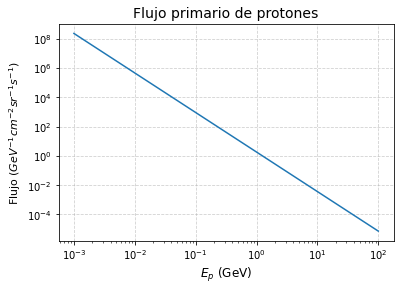

# Modelo del flujo de muones atmosfericos

### Modelo de Gaisser (1990) y Bugaev (1970) 

$\Phi_{G}(E_{0},\theta)=A_{G}E_{0}^{-\gamma}\left(\frac{1}{1+\hat{E_0}cos\theta/E_{0,\pi}^{cr}}+\frac{B_G}{1+\hat{E_0}cos\theta/E_{0,K}^{cr}}+r_c\right)$

Debido a la curvatura de la tierra se tiene que hacer una correccion al angulo  $\theta$

$cos\theta^{*}=\sqrt{1-\frac{1-cos^{2}(\theta)}{(1+H_{atm/R_{Earth}})^{2}}}$,

donde $R_{Earth}$=6370 km y $H_{atm}$ = 32 km

Los valores se encuentan en los siguientes modelos:

In [2]:
#Cargar los modelos iniciales del primer modelo
Models={"MS1":[0.1258,0.0588,2.65,100,650,0],
        "MS2":[0.14,0.054,2.7,115/1.1,850/1.1,0],
        "MS3":[0.175,0.037,2.72,103,810,0],
        "MS4":[0.2576,0.054,2.77,115/1.1,850/1.1,0],
        "MS5":[0.26,0.054,2.78,115/1.1,850/1.1,0]}


In [3]:
def costheta(Θ):
    H=6370
    R=32
    return np.square((1-((1-(np.cos(Θ))**2)/((1+(H/R))**2))))

def Ec(E,Θ):
    return (E+ 0.00206*((1030/costheta(Θ))-120))

def fluxGC(E,Θ,h,model):
    A,B,g,E2,E3,r=Models[model]
    E=Ec(E,Θ)
    return(A*(E**(-g))*((1/(1+E*(costheta(Θ)/E2))+(B/(1+E*(costheta(Θ)/E3))+r)))*np.exp(-h/(4900+750*E)))


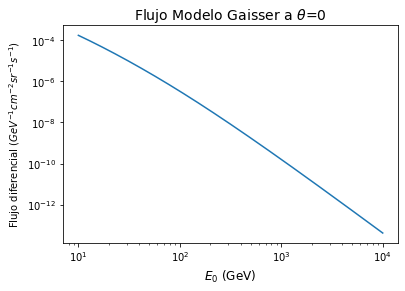

In [4]:
E=np.linspace(10,1e4,10000)
flG=fluxGC(E,0,0,"MS1")

plt.plot(E,flG)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_0$ (GeV)",fontsize=12)
plt.ylabel(r"Flujo diferencial ($GeV^{-1} cm^{-2} sr^{-1} s^{-1}$)")
plt.title(r"Flujo Modelo Gaisser a $\theta$=0 ",fontsize=14);


### Modelo Bugaev (1998)
El modelo empirico para bajas energias del espectro fue:


$\Phi_{B}(p)=A_{B}=p^{-(\alpha_{3} y^{3} + \alpha_{2}y^{2}+\alpha_{1}y+\alpha_{0})}$,

con $p^{2}c^{2}=E_{0}^{2}-E_{\mu}^{2}$ con $E_\mu$=0.10566 GeV

$y=log_{10}(p)$


In [5]:
@np.vectorize
def fluxBugaev(E,h,*o):
    p=((E**2)-(0.10566)**2)**(0.5)
    y=np.log10(p)
    if(p>1 and p<930):
        return ((2.950e-3*p**(-((0.0252*y**3)-(0.263*y**2)+(1.2743*y)+0.3061)))*np.exp(-h/(4900+750*p)))
    elif(p<1590):
        return ((1.781e-2*p**(-((0.304*y)+1.791)))*np.exp(-h/(4900+750*p)))
    elif(p<4.2e5):
        return ((1.435e1*p**(-(3.672))))*np.exp(-h/(4900+750*p))
    else:
        return(10e3*p**(-4)*np.exp(-h/(4900+750*p)))
                 

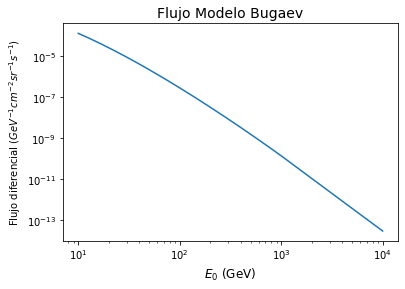

In [6]:
flB=fluxBugaev(E,0)

plt.plot(E,flB)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_0$ (GeV)",fontsize=12)
plt.ylabel(r"Flujo diferencial ($GeV^{-1} cm^{-2} sr^{-1} s^{-1}$)")
plt.title(r"Flujo Modelo Bugaev",fontsize=14);

### Modelo Hebbeker & Timmermans (2002)
$\Phi_{H}=A_{H}10^{H(y)}$

$H(y)=h_{1}\frac{y^3-5y^2+6y}{2}+h_{2}\frac{-2y^3+9y^2-10y+3}{3}+h_{3}\frac{y^3-3y2^2+2y}{6}+s_{2}\frac{y^3-6y2^2+11y-6}{3}$

donde $h_{1}$ = 0.144 , $h_2$=-2.51 , $h_3$= -576 y $s_2$=2.22

### Modelo Guan 
$\Phi_{G}=\left[\frac{E_{\mu}}{GeV}\left(1+\frac{3.64 GeV}{E_{\mu}(cos \theta^{*})^{1.29}}{}\right)\right]^{-2.7}\times\left[\frac{1}{1+\frac{1.1E_{\mu}cos \theta^{*}}{115 GeV}}+\frac{0.054}{1+\frac{1.1E_{\mu}cos \theta^{*}}{850 GeV}}\right]$,

la correcion del angulo:

$cos\theta^{*}=\sqrt{\frac{(cos\theta)^2 +P_1^{2}+P_2(cos\theta)^{P_3}+P_{4}(cos\theta)^{P_5}}{1+P_1^{2}+P_2+P_4}}$

$P_1$=0.102573
$P_2$=-0.068287
$P_3$=0.958633
$P_4$=0.0407253
$P_5$=0.817275

In [7]:
def costhetaN(Θ):
    p1,p2,p3,p4,p5=0.102573, -0.068287, 0.958633,0.0407253,0.817285
    return (0.14*((((np.cos(Θ))**2)+(p1)**2+ p2*(np.cos(Θ))**(p3)+p4*(np.cos(Θ))**(p5))/(1+(p1)**2+p2+p4))**(1/2))


def fluxGuan(E,Θ,h):
    c=((1/(1+(1.1*E*costhetaN(Θ))/(115)))+(0.054/(1+(1.1*E*costhetaN(Θ))/(850))))
    return (0.14*(E*(1+(3.64)/(E*(costhetaN(Θ))**(1.29))))**(-2.7)*c**np.exp(-h/(4900+750*E)))



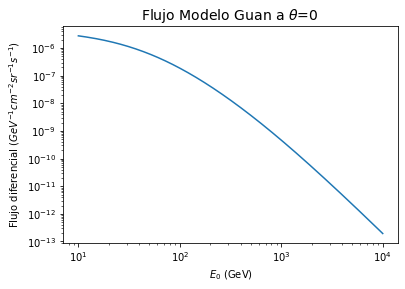

In [8]:
flGu=fluxGuan(E,0,0)
plt.plot(E,flGu)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_0$ (GeV)")
plt.ylabel(r"Flujo diferencial ($GeV^{-1} cm^{-2} sr^{-1} s^{-1}$)")
plt.title(r"Flujo Modelo Guan a $\theta$=0 ",fontsize=14);

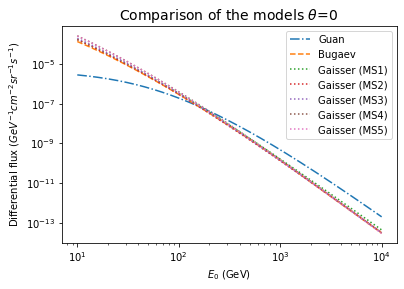

In [9]:
flG1=fluxGC(E,0,0,"MS1")
flG2=fluxGC(E,0,0,"MS2")
flG3=fluxGC(E,0,0,"MS3")
flG4=fluxGC(E,0,0,"MS4")
flG5=fluxGC(E,0,0,"MS5")
plt.plot(E,flGu,label="Guan", linestyle='dashdot')
plt.plot(E,flB, label="Bugaev", ls='--')
plt.plot(E,flG1 ,label="Gaisser (MS1)", linestyle=':')
plt.plot(E,flG2 ,label="Gaisser (MS2)", linestyle=':')
plt.plot(E,flG3 ,label="Gaisser (MS3)", linestyle=':')
plt.plot(E,flG4 ,label="Gaisser (MS4)", linestyle=':')
plt.plot(E,flG5 ,label="Gaisser (MS5)", linestyle=':')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_0$ (GeV)")
plt.ylabel(r"Differential flux ($GeV^{-1} cm^{-2} sr^{-1} s^{-1}$)")
plt.title(r"Comparison of the models $\theta$=0 ",fontsize=14)
plt.legend()

## Caracteristica:

$\Phi(h)=exp(-h/h_{0})\Phi(h=0)$

$h_0$= 4900 +750p


In [10]:
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize

In [11]:
cmap = plt.get_cmap("jet")

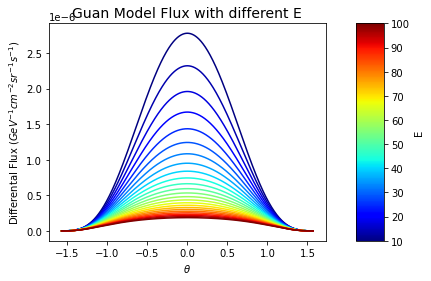

In [12]:
Ang=np.linspace(-np.pi/2,np.pi/2,1000)
E=np.linspace(10,100,25)
norm = Normalize(10,100)

fig,ax = plt.subplots(1,2,gridspec_kw=dict(width_ratios=(1,0.1)))
plt.sca(ax[0])
for i in E:
    fluAn=fluxGuan(i,Ang,0)
    plt.plot(Ang,fluAn,c=cmap(norm(i)))
plt.xlabel(r"$\theta$ ")
plt.ylabel(r"Differental Flux ($GeV^{-1} cm^{-2} sr^{-1} s^{-1}$)")
plt.title(r"Guan Model Flux with different E",fontsize=14)
ColorbarBase(ax[1],cmap=cmap,norm=norm,label="E")

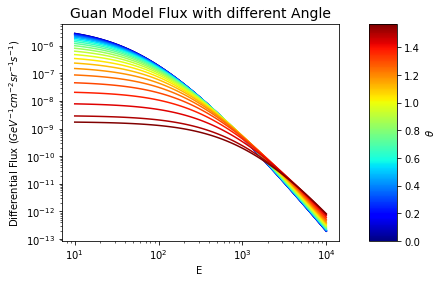

In [13]:
Ang=np.linspace(0,np.pi/2,25)
E=np.logspace(1,4,100)
norm = Normalize(Ang.min(),Ang.max())

fig,ax = plt.subplots(1,2,gridspec_kw=dict(width_ratios=(1,0.1)))
plt.sca(ax[0])
for i in Ang:
    fluAn=fluxGuan(E,i,0)
    plt.plot(E,fluAn,c=cmap(norm(i)))
plt.xlabel(r"E ")
plt.ylabel(r"Differential Flux ($GeV^{-1} cm^{-2} sr^{-1} s^{-1}$)")
plt.title(r"Guan Model Flux with different Angle",fontsize=14)
plt.xscale("log")
plt.yscale("log")
ColorbarBase(ax[1],cmap=cmap,norm=norm,label=r"$\theta$")

In [14]:
Ang=np.linspace(-np.pi/2,np.pi/2,1000)
fluAn=fluxGuan(100000,Ang,0)

## Definimos las funciones de probabilidad para poder obtener numeros aleatorios

In [15]:

def pdf_Ener(x,f,o,h,*arg):
    return f(x,o,h,*arg)

def pdf_Ang(x):
    return (np.cos(x))**2


random_number = np.random.choice(
    np.linspace(10,1e4,10000), 
    p=pdf_Ener(np.linspace(10,1e4,10000),fluxGuan,0,0)/np.sum(pdf_Ener(np.linspace(10,1e4,10000),fluxGuan,0,0))
)

print(random_number)

25.985598559855987


In [16]:
#Generacion de momentos,angulos zenitales y azimutales para cada muon

def genZentith(zen_i,zen_f):
    x1=np.linspace(zen_i,zen_f,1000)
    y1=np.sum(pdf_Ang(x1))
    Zen=np.random.choice(x1, p=(pdf_Ang(x1)/y1))
    return Zen

def GenMomentum(o,p_i,p_f,h,f,*arg):
    x=np.linspace(p_i,p_f,10000)
    y=np.sum(pdf_Ener(x,f,o,*arg))
    E=np.random.choice(x, p=pdf_Ener(x,f,o,*arg)/y)
    p=((E**2)-(0.1057**2))**(1/2)
    return p

def genAzimuth():
    return np.random.uniform(-np.pi/2, np.pi/2)

In [17]:
#o     = Angulo Cenital
#p_i   = Momento Inicial
#p_f   = Momento Final
#h     = Altura 
#f     = Modelo 
#*args = Argumentos del modelo
def GenMomentum(o,p_i,p_f,h,f,*arg):
    x=np.linspace(p_i,p_f,10000)
    y=np.sum(pdf_Ener(x,f,o,h,*arg))
    E=np.random.choice(x, p=pdf_Ener(x,f,o,h,*arg)/y)
    p=((E**2)-(0.1057**2))**(1/2)
    return p

GenMomentum(0,10,1000,10,fluxGC,"MS2")

9.99944135989606

In [18]:
class muon():

     def __init__(self,p_i,p_f,h,zen_i,zen_f,f,*arg):
        self.zenitalAngle=genZentith(zen_i,zen_f)
        self.azimutalAngle=genAzimuth()
        self.momentum=GenMomentum(self.zenitalAngle,p_i,p_f,h,f,*arg)
        self.charge=-1

In [19]:
muon1=muon(10,1e4,0,-np.pi/2,np.pi/2,fluxGuan)
print(muon1.momentum,muon1.zenitalAngle,muon1.azimutalAngle) 

19.990719659947267 -0.2720197843198371 -0.11593466189525747


In [20]:
class sky:
    
    def __init__(self,n,p_i,p_f,h,zen_i,zen_f,f,*arg):
        self.muons=[]
        self.pInital=p_i
        self.pFinal=p_f
        self.h=h
        for i in range(n):
            muon1=muon(p_i,p_f,h,zen_i,zen_f,f,*arg)
            self.muons.append(muon1)
            
    def disMomentum(self):
        momentuns=[]
        for i in self.muons:
            momentuns.append(i.momentum)
        return momentuns
    
    def disZenital(self):
        Zenitals=[]
        for i in self.muons:
            Zenitals.append(i.zenitalAngle)
        return Zenitals
    
    def disAzimutal(self):
        azimutals=[]
        for i in self.muons:
            azimutals.append(i.azimutalAngle)
        return azimutals
    
    def muonsMomentum(self,p_i,p_f):
        momen=[]
        for i in self.muons:
            if(i.momentum>p_i and i.momentum<p_f):
                momen.append(i)
        return momen               
        
    def addmuon(self,n,pi,pf,j,f,f2,*arg):
        for i in range(n):
            muon1=muon(pi,pf,self.h,j,f,f2,*arg)
            self.muons.append(muon1)


In [21]:
%%time
l=fluxGC
sky1=sky(10000,10,1e4,0,-np.pi/2,np.pi/2,l,"MS2")



Wall time: 22 s


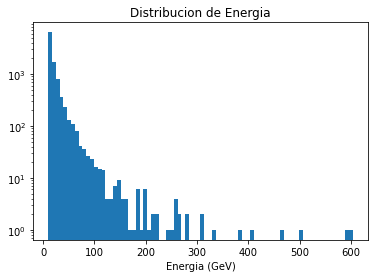

In [22]:
mon=sky1.disMomentum()
plt.hist(mon,bins=80)
plt.title("Distribucion de Energia")
plt.xlabel("Energia (GeV)")
plt.yscale("log")




Text(0.5, 0, 'Angulo (rad)')

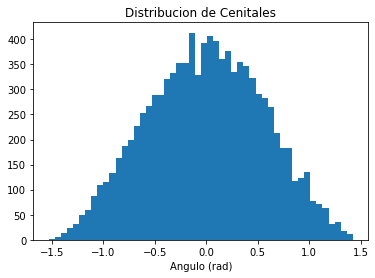

In [23]:
zen=sky1.disZenital()
plt.hist(zen,bins=50)
plt.title("Distribucion de Cenitales")
plt.xlabel("Angulo (rad)")


In [24]:
hist, bin_edges = np.histogram(zen, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

def cosenos(x, A,w,n):
    return A*(np.cos(w*x)**n)

popt, pcov = curve_fit(cosenos, bin_centers, hist)
perr = np.sqrt(np.diag(pcov))
mu_fit, sigma_fit,n_fit = popt
print(f"Parámetros del ajuste: A={mu_fit}, W={sigma_fit}, n={n_fit}")
print(perr)
y_fit = cosenos(bin_centers, mu_fit, sigma_fit, n_fit)

# Calcular el estadístico chi-cuadrado
residuals = hist - y_fit
chi_square = np.sum(residuals**2)

print("Estadistico Chi-cuadrado:", chi_square)

Parámetros del ajuste: A=0.6505532106295558, W=0.9548155764283335, n=2.3678732935486964
[0.00805416 0.07574611 0.474977  ]
Estadistico Chi-cuadrado: 0.03325976361775839


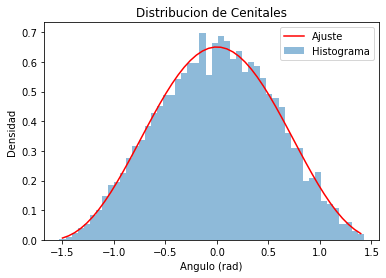

In [25]:
x=zen
plt.hist(x, 50, density=True, alpha=0.5, label='Histograma')
plt.plot(bin_centers, cosenos(bin_centers, mu_fit, sigma_fit,n_fit), 'r-', label='Ajuste')
plt.title("Distribucion de Cenitales")
plt.xlabel("Angulo (rad)")

plt.ylabel('Densidad')
plt.legend()
plt.show()

Text(0.5, 0, 'Angulo (rad)')

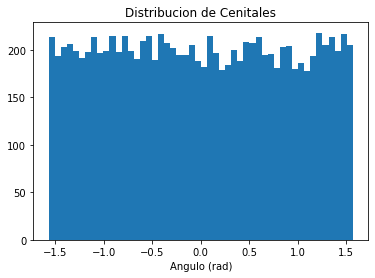

In [26]:
azimutal=sky1.disAzimutal()
plt.hist(azimutal,bins=50)
plt.title("Distribucion de Cenitales")
plt.xlabel("Angulo (rad)")